In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')

csv: comma seperated values의 약자로 콤마로 열이 구분되어 있다
tsv: tab~~

|이름|설명|
|-|-|
|read_csv|csv파일을 불러옴|
|sep|구분자 설정|
|set_option|옵션 설정|
|display.max_columns|표시 되는 최대 행(작으면 ... 으로 표시 됨)|

In [2]:
df = pd.read_csv("./chipotle.tsv", sep="\t")  # 구분자를 tab으로
pd.set_option('display.max_columns', 3)

shape: dataframe의 모양 (행, 열)

In [3]:
df.shape

(4622, 5)

## info
전반적인 정보를 보여준다.

여기서 결측값(null)을 확인해야 한다.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


이 외에도 isnull이라는 것을 사용해서 결측값을 확인할 수 있다.

결측값을 채울 때는 fillna를 사용한다.
꼭!!! 결측값을 채우고 나서 대입해야 값이 나온다.

In [5]:
df.isnull().sum()
df['choice_description'] = df['choice_description'].fillna('[]')

## head
위에서 부터 다섯줄

In [6]:
df.head()

,order_id,...,item_price
0,1,...,$2.39
1,1,...,$3.39
2,1,...,$3.39
3,1,...,$2.39
4,2,...,$16.98


In [7]:
pd.set_option('display.max_columns', 100)
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,[],$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,[],$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


## describe
기초 통계량.
numeric(int, float) 칼럼에 대해서만 알려준다.

In [8]:
df.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


## 데이터 전처리
여기서 item_price는 사실상 numeric한 변수인데, `$` 때문에 문자로 취급 됐다

그리고 order_id는 numeric해봤자 쓸모가 없기 때문에 object로 다시 바꿔준다.

In [9]:
df['order_id'] = df['order_id'].astype(str)
df['item_price'] = df['item_price'].apply(lambda x: float(x[1:]))

In [10]:
df.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [11]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,[],2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,[],2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


* 각 행을 선택했을 때 반환 타입: Series
* 여러 행을 선택했을 때 반환 타입: DataFrame

In [12]:
type(df['order_id'])

pandas.core.series.Series

In [13]:
type(df[['order_id', 'item_price']])

pandas.core.frame.DataFrame

In [14]:
df[['order_id', 'item_price']]

,order_id,item_price
0,1,2.39
1,1,3.39
2,1,3.39
3,1,2.39
4,2,16.98
...,...,...
4617,1833,11.75
4618,1833,11.75
4619,1834,11.25
4620,1834,8.75


In [15]:
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,[],2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,[],2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


## Series.unique()
반환 타입: ndarray

In [16]:
df['order_id'].unique()

array(['1', '2', '3', ..., '1832', '1833', '1834'], dtype=object)

In [17]:
# 주문 개수
df['order_id'].unique().size

1834

In [18]:
pd.Series([1, 2, 3, 3, 3, 4, 4, 5]).unique()

array([1, 2, 3, 4, 5])

In [19]:
df['item_name'].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

## Series.value_counts()
반환 타입: Series

In [20]:
df['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [21]:
df['item_name'].unique().size


50

In [22]:
df['item_name'].value_counts().size

50

In [23]:
unique = df['item_name'].unique()
unique.sort()
unique

array(['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito',
       'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl',
       'Barbacoa Soft Tacos', 'Bottled Water', 'Bowl', 'Burrito',
       'Canned Soda', 'Canned Soft Drink', 'Carnitas Bowl',
       'Carnitas Burrito', 'Carnitas Crispy Tacos', 'Carnitas Salad',
       'Carnitas Salad Bowl', 'Carnitas Soft Tacos', 'Chicken Bowl',
       'Chicken Burrito', 'Chicken Crispy Tacos', 'Chicken Salad',
       'Chicken Salad Bowl', 'Chicken Soft Tacos', 'Chips',
       'Chips and Fresh Tomato Salsa', 'Chips and Guacamole',
       'Chips and Mild Fresh Tomato Salsa',
       'Chips and Roasted Chili Corn Salsa',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Tomatillo Green Chili Salsa',
       'Chips and Tomatillo Red Chili Salsa',
       'Chips and Tomatillo-Green Chili Salsa',
       'Chips and Tomatillo-Red Chili Salsa', 'Crispy Tacos', 'Izze',
       'Nantucket Nectar', 'Salad', 'Side of Chips', 'Steak Bowl',
       'Steak

In [24]:
value_counts = df['item_name'].value_counts().index.to_numpy()
value_counts.sort()
value_counts

array(['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito',
       'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl',
       'Barbacoa Soft Tacos', 'Bottled Water', 'Bowl', 'Burrito',
       'Canned Soda', 'Canned Soft Drink', 'Carnitas Bowl',
       'Carnitas Burrito', 'Carnitas Crispy Tacos', 'Carnitas Salad',
       'Carnitas Salad Bowl', 'Carnitas Soft Tacos', 'Chicken Bowl',
       'Chicken Burrito', 'Chicken Crispy Tacos', 'Chicken Salad',
       'Chicken Salad Bowl', 'Chicken Soft Tacos', 'Chips',
       'Chips and Fresh Tomato Salsa', 'Chips and Guacamole',
       'Chips and Mild Fresh Tomato Salsa',
       'Chips and Roasted Chili Corn Salsa',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Tomatillo Green Chili Salsa',
       'Chips and Tomatillo Red Chili Salsa',
       'Chips and Tomatillo-Green Chili Salsa',
       'Chips and Tomatillo-Red Chili Salsa', 'Crispy Tacos', 'Izze',
       'Nantucket Nectar', 'Salad', 'Side of Chips', 'Steak Bowl',
       'Steak

In [25]:
# 들어가는 데이터는 1차원, index는 무조건 숫자가 아니다.
pd.Series([1, 2, 3], index=['a', 'b', 'c'])

a    1
b    2
c    3
dtype: int64

In [26]:
list(df['item_name'].value_counts().iteritems())

[('Chicken Bowl', 726),
 ('Chicken Burrito', 553),
 ('Chips and Guacamole', 479),
 ('Steak Burrito', 368),
 ('Canned Soft Drink', 301),
 ('Steak Bowl', 211),
 ('Chips', 211),
 ('Bottled Water', 162),
 ('Chicken Soft Tacos', 115),
 ('Chicken Salad Bowl', 110),
 ('Chips and Fresh Tomato Salsa', 110),
 ('Canned Soda', 104),
 ('Side of Chips', 101),
 ('Veggie Burrito', 95),
 ('Barbacoa Burrito', 91),
 ('Veggie Bowl', 85),
 ('Carnitas Bowl', 68),
 ('Barbacoa Bowl', 66),
 ('Carnitas Burrito', 59),
 ('Steak Soft Tacos', 55),
 ('6 Pack Soft Drink', 54),
 ('Chips and Tomatillo Red Chili Salsa', 48),
 ('Chicken Crispy Tacos', 47),
 ('Chips and Tomatillo Green Chili Salsa', 43),
 ('Carnitas Soft Tacos', 40),
 ('Steak Crispy Tacos', 35),
 ('Chips and Tomatillo-Green Chili Salsa', 31),
 ('Steak Salad Bowl', 29),
 ('Nantucket Nectar', 27),
 ('Barbacoa Soft Tacos', 25),
 ('Chips and Roasted Chili Corn Salsa', 22),
 ('Chips and Tomatillo-Red Chili Salsa', 20),
 ('Izze', 20),
 ('Chips and Roasted Chili

### enumerate: 파이썬 내장 함수
enumerate(반복 가능한 객체[, 시작 index])

In [27]:
list(enumerate("abcdefg", 1))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd'), (5, 'e'), (6, 'f'), (7, 'g')]

In [28]:
list(enumerate(df['item_name'].value_counts().iteritems(), 1))

[(1, ('Chicken Bowl', 726)),
 (2, ('Chicken Burrito', 553)),
 (3, ('Chips and Guacamole', 479)),
 (4, ('Steak Burrito', 368)),
 (5, ('Canned Soft Drink', 301)),
 (6, ('Steak Bowl', 211)),
 (7, ('Chips', 211)),
 (8, ('Bottled Water', 162)),
 (9, ('Chicken Soft Tacos', 115)),
 (10, ('Chicken Salad Bowl', 110)),
 (11, ('Chips and Fresh Tomato Salsa', 110)),
 (12, ('Canned Soda', 104)),
 (13, ('Side of Chips', 101)),
 (14, ('Veggie Burrito', 95)),
 (15, ('Barbacoa Burrito', 91)),
 (16, ('Veggie Bowl', 85)),
 (17, ('Carnitas Bowl', 68)),
 (18, ('Barbacoa Bowl', 66)),
 (19, ('Carnitas Burrito', 59)),
 (20, ('Steak Soft Tacos', 55)),
 (21, ('6 Pack Soft Drink', 54)),
 (22, ('Chips and Tomatillo Red Chili Salsa', 48)),
 (23, ('Chicken Crispy Tacos', 47)),
 (24, ('Chips and Tomatillo Green Chili Salsa', 43)),
 (25, ('Carnitas Soft Tacos', 40)),
 (26, ('Steak Crispy Tacos', 35)),
 (27, ('Chips and Tomatillo-Green Chili Salsa', 31)),
 (28, ('Steak Salad Bowl', 29)),
 (29, ('Nantucket Nectar', 27)

In [29]:
for idx, (name, counts) in enumerate(df['item_name'].value_counts().iteritems(), 1):
    print(f"{idx}.\t{counts}\t{name}")

1.	726	Chicken Bowl
2.	553	Chicken Burrito
3.	479	Chips and Guacamole
4.	368	Steak Burrito
5.	301	Canned Soft Drink
6.	211	Steak Bowl
7.	211	Chips
8.	162	Bottled Water
9.	115	Chicken Soft Tacos
10.	110	Chicken Salad Bowl
11.	110	Chips and Fresh Tomato Salsa
12.	104	Canned Soda
13.	101	Side of Chips
14.	95	Veggie Burrito
15.	91	Barbacoa Burrito
16.	85	Veggie Bowl
17.	68	Carnitas Bowl
18.	66	Barbacoa Bowl
19.	59	Carnitas Burrito
20.	55	Steak Soft Tacos
21.	54	6 Pack Soft Drink
22.	48	Chips and Tomatillo Red Chili Salsa
23.	47	Chicken Crispy Tacos
24.	43	Chips and Tomatillo Green Chili Salsa
25.	40	Carnitas Soft Tacos
26.	35	Steak Crispy Tacos
27.	31	Chips and Tomatillo-Green Chili Salsa
28.	29	Steak Salad Bowl
29.	27	Nantucket Nectar
30.	25	Barbacoa Soft Tacos
31.	22	Chips and Roasted Chili Corn Salsa
32.	20	Chips and Tomatillo-Red Chili Salsa
33.	20	Izze
34.	18	Chips and Roasted Chili-Corn Salsa
35.	18	Veggie Salad Bowl
36.	11	Barbacoa Crispy Tacos
37.	10	Barbacoa Salad Bowl
38.	9	Chick

## groupby

In [30]:
# 음식 주문 횟수
df.groupby('item_name')['order_id'].count()

item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


In [31]:
# 음식 주문 량
df.groupby('item_name')['quantity'].sum()

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


## Series.plot()

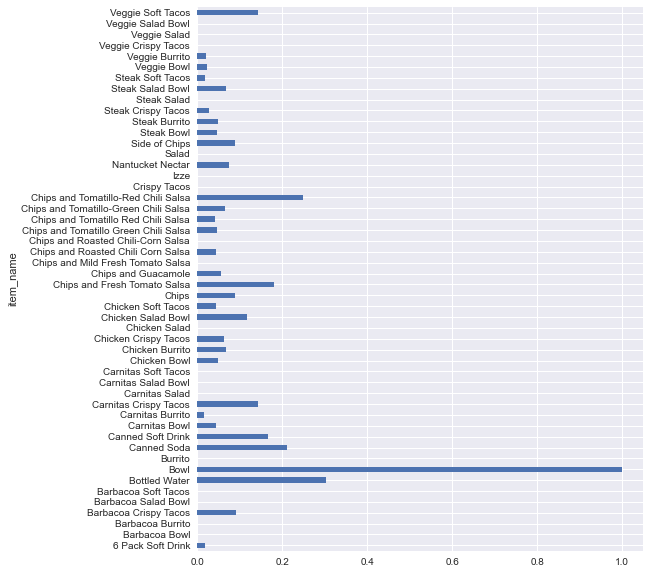

In [32]:
plt.subplots(figsize=(8, 10))
per = df.groupby('item_name')['quantity'].sum() / df.groupby('item_name')['order_id'].count() - 1
per.plot(kind='barh')
# plt.barh(per.index, per.values)
plt.show()

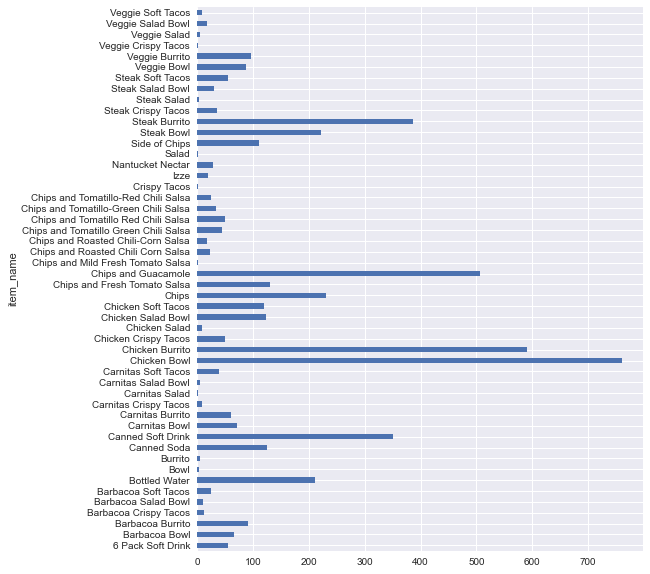

In [33]:
plt.subplots(figsize=(8, 10))
df.groupby('item_name')['quantity'].sum().plot(kind='barh')
plt.show()

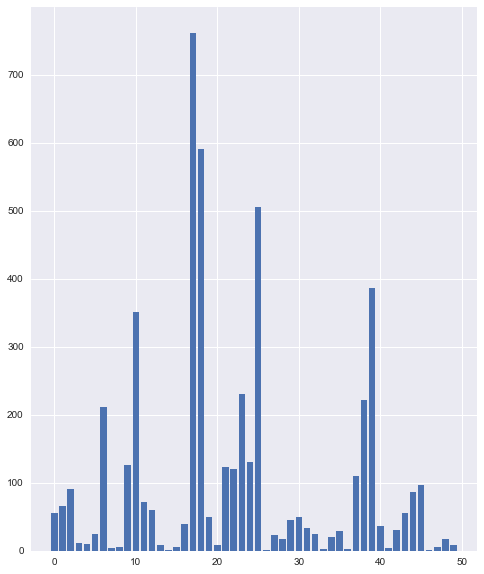

In [34]:
plt.subplots(figsize=(8, 10))
item_quantity = df.groupby('item_name')['quantity'].sum()
plt.bar(np.arange(item_quantity.size), item_quantity.values)
plt.show()


In [35]:
# 테이블 당 낸 금액
sum_by_order_id = df.groupby('order_id')['item_price'].sum()
sum_by_order_id

order_id
1       11.56
10      13.20
100     10.08
1000    20.50
1001    10.08
        ...  
995     24.95
996     43.00
997     22.50
998     10.88
999     29.25
Name: item_price, Length: 1834, dtype: float64

In [36]:
# 테이블 당 낸 금액의 평균
df.groupby('order_id')['item_price'].sum().mean()

18.811428571428568

In [37]:
# $20 이상 낸 테이블의 주문 번호 (order_id)
sum_by_order_id[sum_by_order_id >= 20].index.values

array(['1000', '1004', '1006', '1010', '1012', '1013', '1016', '1017',
       '1026', '103', '1030', '1031', '1033', '1035', '1038', '1041',
       '1044', '1051', '1052', '1057', '1059', '1063', '1070', '1071',
       '1074', '1076', '1078', '1079', '108', '1080', '1082', '1085',
       '1087', '1088', '1091', '1092', '1095', '1097', '110', '1102',
       '1103', '1106', '1110', '1113', '1115', '1116', '1126', '1128',
       '1136', '1138', '1140', '1142', '1153', '1154', '1156', '1157',
       '1158', '1166', '1167', '1168', '1169', '1170', '1171', '1175',
       '1176', '1182', '1188', '1189', '1191', '1193', '1196', '1206',
       '1208', '1209', '1221', '1222', '1223', '1224', '1226', '1228',
       '123', '124', '1243', '1244', '1248', '125', '1250', '1255',
       '1257', '126', '1261', '1269', '1270', '1271', '1276', '128',
       '1282', '1283', '1289', '129', '1294', '1296', '1297', '1304',
       '1317', '132', '1320', '1322', '1323', '1330', '1331', '1334',
       '1336', '

In [38]:
one_quantity = df[df.quantity == 1]
one_quantity['item_name'].value_counts()

Chicken Bowl                             693
Chicken Burrito                          521
Chips and Guacamole                      455
Steak Burrito                            352
Canned Soft Drink                        264
Steak Bowl                               202
Chips                                    193
Bottled Water                            139
Chicken Soft Tacos                       110
Chips and Fresh Tomato Salsa             105
Side of Chips                             99
Chicken Salad Bowl                        97
Veggie Burrito                            94
Barbacoa Burrito                          91
Canned Soda                               84
Veggie Bowl                               83
Barbacoa Bowl                             66
Carnitas Bowl                             66
Carnitas Burrito                          58
Steak Soft Tacos                          54
6 Pack Soft Drink                         53
Chips and Tomatillo Red Chili Salsa       46
Chicken Cr

In [39]:
one_quantity.groupby('item_name').item_price.min()

item_name
6 Pack Soft Drink                        6.49
Barbacoa Bowl                            8.69
Barbacoa Burrito                         8.69
Barbacoa Crispy Tacos                    8.99
Barbacoa Salad Bowl                      9.39
Barbacoa Soft Tacos                      8.99
Bottled Water                            1.09
Bowl                                     7.40
Burrito                                  7.40
Canned Soda                              1.09
Canned Soft Drink                        1.25
Carnitas Bowl                            8.99
Carnitas Burrito                         8.69
Carnitas Crispy Tacos                    8.99
Carnitas Salad                           8.99
Carnitas Salad Bowl                      9.39
Carnitas Soft Tacos                      8.99
Chicken Bowl                             8.19
Chicken Burrito                          8.19
Chicken Crispy Tacos                     8.49
Chicken Salad                            8.19
Chicken Salad Bowl      

DataFrame.min()은 각각의 칼럼에서 가장 작은 값을 가져온 뒤, 합치는 것이다.

같은 줄에 있다고 해서 같은 레코드가 아니다!!!

In [40]:
one_quantity.groupby('item_name').min()[1:2]

,order_id,quantity,choice_description,item_price
item_name,,,,
Barbacoa Bowl,1000,1,"[Fresh Tomato (Mild), [Lettuce, Black Beans, R...",8.69


In [41]:
one_quantity[(one_quantity.order_id == '1000') & (one_quantity.item_name == 'Barbacoa Bowl')]

,order_id,quantity,item_name,choice_description,item_price
2517,1000,1,Barbacoa Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",9.25


In [42]:
pd.DataFrame({
    'a': ['a', 'b', 'c'],
    'b': [3, 2, 1]
}).min()

a    a
b    1
dtype: object

In [43]:
# 가장 비싼 주문에서 / 아이템이 총 몇 개 팔렸는지 구하기
df.groupby('order_id').sum().sort_values(by='item_price', ascending=False).iloc[0].quantity.astype(int)

23

In [44]:
# 특정 아이템을 주문 시킨 테이블 수
df[(df.item_name == 'Chicken Bowl') | (df.item_name == 'Veggie Salad Bowl')].drop_duplicates(['item_name', 'order_id']).index.size

633

In [45]:
# 특정 아이템을 2개 이상 주문한 주문 횟수 구하기

# chicken_bowl_quantity는 Index가 order_id고, value가 quantity의 합인 Series
chicken_bowl_quantity = df[df.item_name == 'Chicken Bowl'].groupby('order_id').quantity.sum()
chicken_bowl_quantity[chicken_bowl_quantity >= 2].size


114